#### **Fetch Data**

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = 'https://github.com/ageron/data/raw/refs/heads/main'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT +'/housing.tgz'

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path): os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, 'housing.tgz')
#     try: urllib.request.urlretrieve(housing_url, tgz_path)
#     except urllib.error.HTTPError as e:
#         print(f'Failed to fetch {housing_url}')
#         print(f"HTTP Error: {e.code} - {e.reason}")
#         return
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()
    
# fetch_housing_data()

#### **Load Data**

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing\\housing.csv')
    return pd.read_csv(csv_path)

housing = load_housing_data()

In [3]:
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


*NOTE:*
1. There are some null values in total_bedrooms column.
2. ocean_proximity is a categorical attribute.

In [4]:
from collections import Counter
print(Counter(housing['ocean_proximity']))
# or
housing['ocean_proximity'].value_counts()

Counter({'<1H OCEAN': 9136, 'INLAND': 6551, 'NEAR OCEAN': 2658, 'NEAR BAY': 2290, 'ISLAND': 5})


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### **Visualize Data**

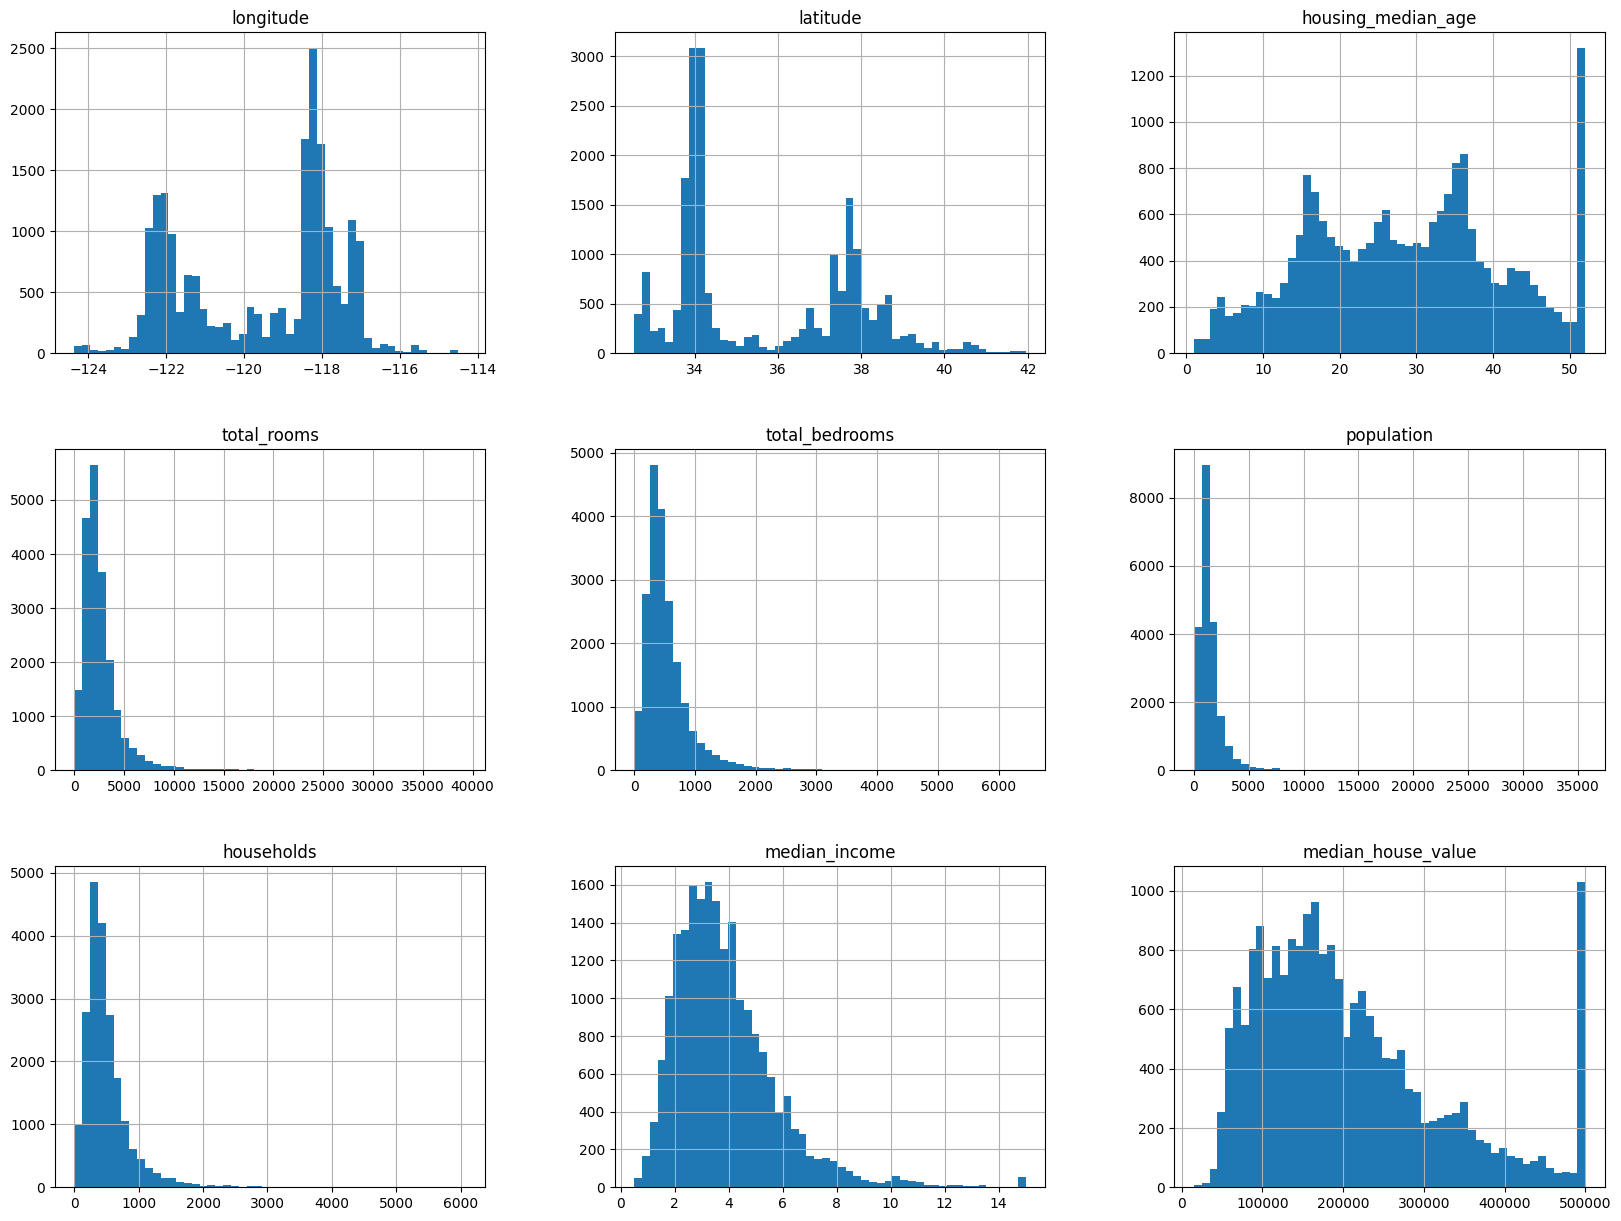

In [6]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

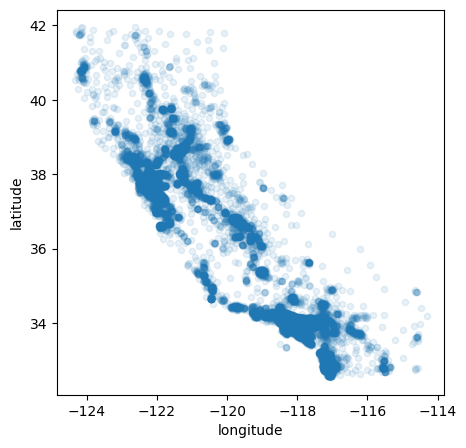

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize=(5,5))
plt.show()

#### **Creating a Test Set**
1. To randomly split, we can just permut the indexes.
2. To get specific test set, we can use a seeded random generator.  
Another way to achieve 2 is by using  
`sklearn.model_selection.train_test_split` function.

In [8]:
import numpy as np

def split_train_test(data, test_ratio, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices, train_indices = (
        shuffled_indices[:test_set_size], shuffled_indices[test_set_size:])
    return data.iloc[train_indices], data.iloc[test_indices]

train_test, test_set = split_train_test(housing, 0.2)
print(f"Rows in train set: {len(train_test)}\nRows in test set: {len(test_set)}")

train_test.head()

Rows in train set: 16512
Rows in test set: 4128


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


<Axes: >

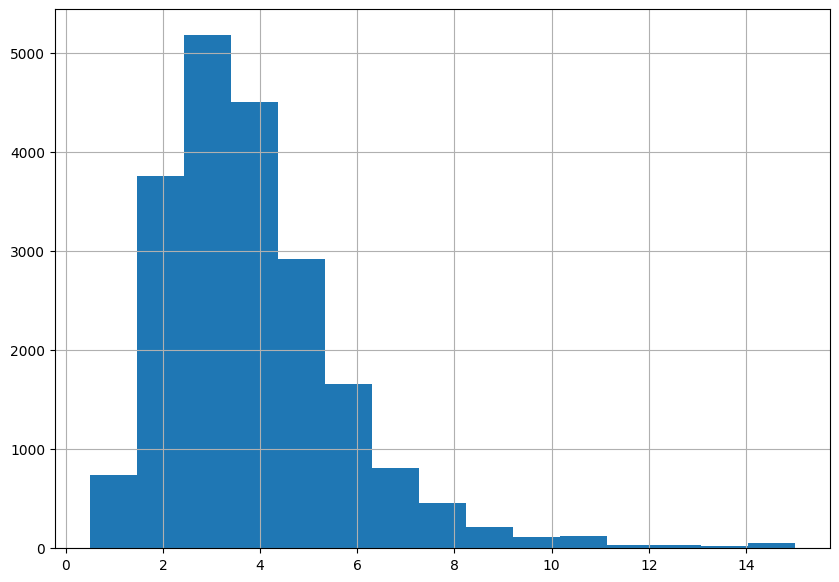

In [10]:
housing['median_income'].hist(bins=15, figsize=(10,7))

**NOTE**  
Sometimes random sampling maybe dangerous. So we divide data based on some specific attribute.  
Here we divide data based on income attribute.  
| Income Category | Overall | Random | Stratified | Rand. %error | Strat. %error |
|-----------------|---------|--------|------------|--------------|-----------------|
| 1.0             | 0.039826| 0.040213| 0.039738   | 0.973236     | -0.219137      |
| 2.0             | 0.318847| 0.324370| 0.318876   | 1.732260     | 0.009032       |
| 3.0             | 0.350581| 0.358527| 0.350618   | 2.266446     | 0.010408       |
| 4.0             | 0.176308| 0.167393| 0.176399   | -5.056334    | 0.051717      |
| 5.0             | 0.114438| 0.109496| 0.114369   | -4.318374    | -0.060464     |

Further we also cap the max value, if we don't cap it, then some categories will have very less data points.


<Axes: >

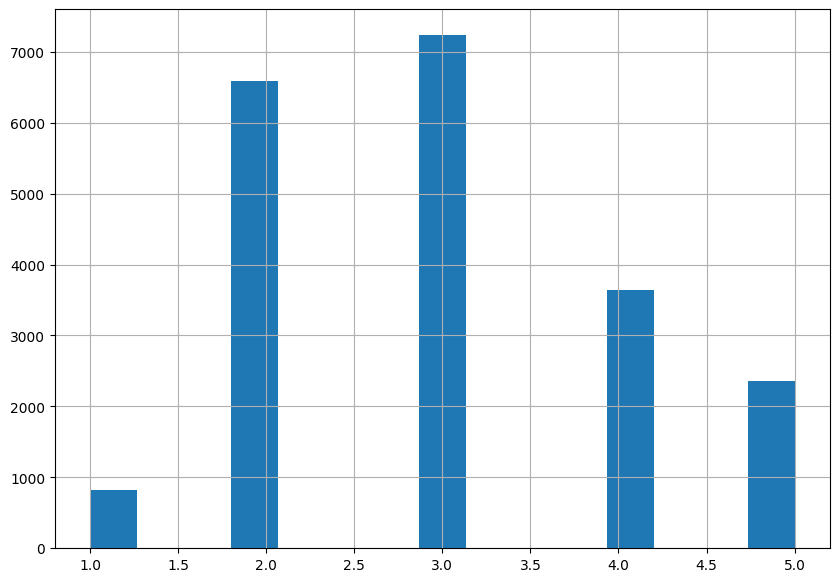

In [32]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'] = housing['income_cat'].apply(lambda x: min(x, 5.0))
housing['income_cat'].hist(bins=15, figsize=(10,7))

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [34]:
from collections import Counter
from math import ceil

Rand_Counter = Counter(min(5,ceil(i/1.5)) for i in test_set['median_income'])
Strat_Counter = Counter(strat_test_set['income_cat'])
Original_Counter = Counter(min(5,ceil(i/1.5)) for i in housing['median_income'])

Category_Proportion = pd.DataFrame({
    'Original': {k: v / len(housing) for k, v in Original_Counter.items()},
    'Random Test': {k: v / len(test_set) for k, v in Rand_Counter.items()},
    'Stratified Test': {k: v / len(strat_test_set) for k, v in Strat_Counter.items()},
})
print('Random Sampling Income Category Proportions:')
print(Category_Proportion)

Random Sampling Income Category Proportions:
   Original  Random Test  Stratified Test
5  0.114438     0.120882         0.114341
4  0.176308     0.184109         0.176357
3  0.350581     0.345203         0.350533
2  0.318847     0.307413         0.318798
1  0.039826     0.042393         0.039971


It is clear that stratified sampling gives much better representation of different categories. Hence we will use stratified sampling to create test set.  
Now, we drop income_cat attribute from both test and train set as it is no longer needed.

In [35]:
strat_test_set.drop('income_cat', axis=1, inplace=True)
strat_train_set.drop('income_cat', axis=1, inplace=True)